В этом блокноте мы обучим простейшую модель линейной регрессии, используя TF

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Зададим количество объектов, размер батча для шага оптимизатора, количество шагов

In [ ]:
n_samples, batch_size, num_steps = 1000, 100, 20000

Сгенерируем набор данных по закону
$$
y = 2x + 1 + \varepsilon, \quad \varepsilon \sim \mathsf N_{0, 2}, \quad x \in \mathsf U_{1, 10}.
$$
Последние переменные детерменированы, но сгенерированы случайным образом

In [ ]:
X_data = np.random.uniform(1, 10, (n_samples, 1))
y_data = 2 * X_data + 1 + np.random.normal(0, 2, (n_samples, 1))

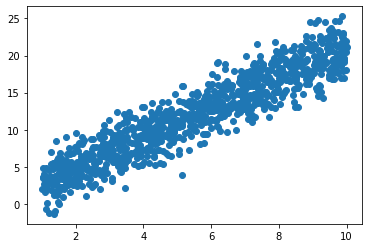

In [ ]:
plt.scatter(X_data, y_data)

Определим случайным образом оцениваемы параметры $k, b$ линии регрессии
$$
y = kx + b
$$

In [ ]:
k = tf.Variable(tf.random.normal([1, 1], mean = 0, stddev = 1), name = 'slope')
b = tf.Variable(tf.random.normal([1, 1], mean = 0, stddev = 1), name = 'biases')
# Создаем тензоры для дальнейшей работы с tf
X_data = tf.constant(X_data, dtype = tf.float32)
y_data = tf.constant(y_data, dtype = tf.float32)
# Сформируем выборки для обучения
indices = tf.constant(np.random.choice(n_samples, batch_size), shape = (batch_size, 1))
X_batch, y_batch = tf.gather_nd(X_data, indices), tf.gather_nd(y_data, indices)

Определим функцию для предсказания

In [ ]:
@tf.function
def y_pred(X):
  return tf.add(tf.matmul(X, k), b)

Определим функцию потерь: МНК

In [ ]:
@tf.function
def loss():
  return tf.reduce_sum(tf.square(y_batch - y_pred(X_batch)))

Выберем некий оптимизатор, определим переменные, которые будем обучать

In [ ]:
optimizer = tf.optimizers.Adam(0.01)
trainable_vars = [k, b]

Обучим модель

In [ ]:
display_step = 100
for i in range(num_steps):
  indices = tf.constant(np.random.choice(n_samples, batch_size), shape = (batch_size, 1))
  X_batch, y_batch = tf.gather_nd(X_data, indices), tf.gather_nd(y_data, indices)
  optimizer.minimize(loss, trainable_vars)
  if ((i + 1) % display_step == 0):
    print('Epoch: ' + str(i) + ' k: ' + str(k) + ' b: ' + str(b))

Epoch: 99 k: <tf.Variable 'slope:0' shape=(1, 1) dtype=float32, numpy=array([[1.7583927]], dtype=float32)> b: <tf.Variable 'biases:0' shape=(1, 1) dtype=float32, numpy=array([[1.0560147]], dtype=float32)>
Epoch: 199 k: <tf.Variable 'slope:0' shape=(1, 1) dtype=float32, numpy=array([[2.0216188]], dtype=float32)> b: <tf.Variable 'biases:0' shape=(1, 1) dtype=float32, numpy=array([[1.3170702]], dtype=float32)>
Epoch: 299 k: <tf.Variable 'slope:0' shape=(1, 1) dtype=float32, numpy=array([[2.0534358]], dtype=float32)> b: <tf.Variable 'biases:0' shape=(1, 1) dtype=float32, numpy=array([[1.345447]], dtype=float32)>
Epoch: 399 k: <tf.Variable 'slope:0' shape=(1, 1) dtype=float32, numpy=array([[2.055097]], dtype=float32)> b: <tf.Variable 'biases:0' shape=(1, 1) dtype=float32, numpy=array([[1.3431095]], dtype=float32)>
Epoch: 499 k: <tf.Variable 'slope:0' shape=(1, 1) dtype=float32, numpy=array([[2.0556695]], dtype=float32)> b: <tf.Variable 'biases:0' shape=(1, 1) dtype=float32, numpy=array([[1.